# Analiza evoluției indicelui Dow Jones

**Scop:** Prezentarea principalilor indicatori statistici pentru indicele bursier Dow Jones, folosind metode de prezentare similare cu cele ale Institutului Național de Statistică.  
**Perioada analizată:** 1914–1968  

---




**Structura analizei**

1.  Incarcare si pregătirea datelor
2.  Indici (bază 100)
3.  Alegerea perioadelor de analiza
4.  Calculul indicatorilor pe fiecare perioada
5.  Vizualizari detaliate pe fiecare perioada
6.  Interpretarea datelor(stil INS)
1.  Concluzii finale

---



**1. Incarcare si pregatire date**




In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DateOffset

In [6]:
df = sns.load_dataset('dowjones')
print(df.info(), 'info\n')
print(df.describe(), 'descriere\n')
print(df.isnull().sum(), 'suma valorilor null')
print(df.index.duplicated().sum(), 'duplicate\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    649 non-null    datetime64[ns]
 1   Price   649 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.3 KB
None info

                                Date       Price
count                            649  649.000000
mean   1941-11-30 17:42:48.258859776  290.807319
min              1914-12-01 00:00:00   46.850000
25%              1928-06-01 00:00:00  106.900000
50%              1941-12-01 00:00:00  172.270000
75%              1955-06-01 00:00:00  436.730000
max              1968-12-01 00:00:00  985.930000
std                              NaN  256.062906 descriere

Date     0
Price    0
dtype: int64 suma valorilor null
0 duplicate



**Elemente de statistica descriptiva a setului de date Dow Jones**
| Statistica descriptiva | Date          | Price          |
|------------------------|---------------|----------------|
| **Valid**              | 649           |649             |
| **Lipsa**              | 0             | 0              |
| **Mediana**            | 30.11.1941    | 290.81         |
| **Min**                | 12.01.1914    | 46.05          |
| **25%**                | 01.06.1928    | 106.90         |
| **50%**                | 01.12.1941    | 172.27         |
| **75%**                | 01.06.1955    | 436.73         |
| **Max**                | 01.12.1968    | 985.93         |
| **std**                | NaN           | 256.06         |
| **Tipul datelor**      | datetime64[ns]| float64        |
---

**2. Indici Baza 100**

Alegerea indicelui baza 100 am făcut-o pentru a normaliza setul de date, după un an de referință, ce respectă mai multe criterii, după cum urmează:

* **Stabil economic/politic** – fără războaie majore, crize financiare sau hiperinflatie.  
  - 1929–1933 - Marea criză economică - instabil.  
  - 1939–1945 - Al Doilea Război Mondial - exclus.  
  - După 1945 începe perioada de reconstrucție și creștere economică stabilă în SUA.  

* **Reprezentativ** – nu la un minim sau maxim extrem, ci într-o zonă „medie” a evoluției.  
  - Valorile indicatorilor să fie apropiate de media perioadei analizate.
  - Să reflecte tendințele generale ale pieței, nu excepțiile.  

Conform criteriilor de mai sus am ales ca **an de referinta 1950**.

---

**3. Alegerea perioadelor de analiza**
  - 1914–1918 - Primul razboi mondial
  - 1918-1939 - Perioada interbelica  
  - 1929–1933 - Marea criza economica  
  - 1939–1945 - Al Doilea Război Mondial  
  - 1950-1960 - Perioada postbelica - de crestere  


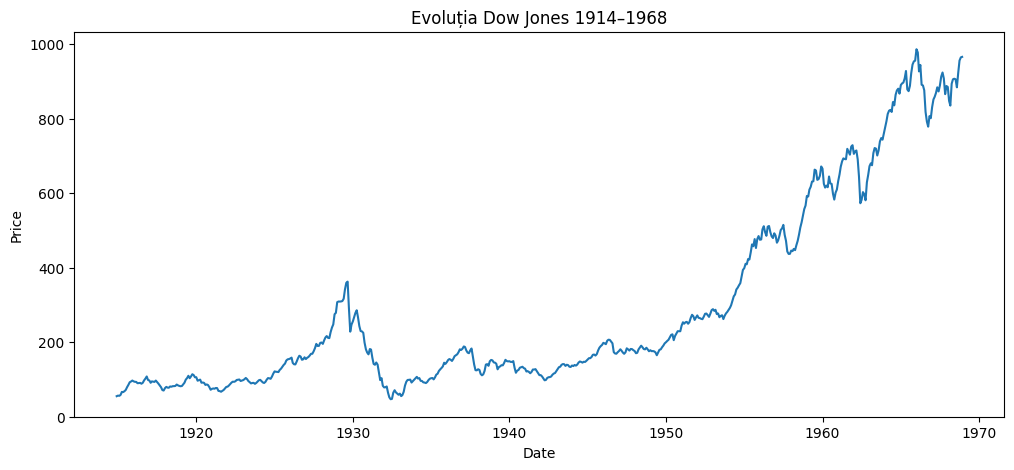

In [7]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="Date", y="Price")
plt.title("Evoluția Dow Jones 1914–1968")
plt.show()

---
**4. Calculul indicatorilor pentru fiecare perioada**

*   creez functia dj_custom pentru a filtra perioade de timp
*   creez functia calc_stats pentru statistici de baza pentru fiecare perioada



In [8]:
def dj_custom(start, luni):
    start = pd.Timestamp(start)                 #Timestamp in pandas echivalent datetime in pyth. Util pe o coloana de date
    end = start + pd.DateOffset(years=0, months=luni, days=0)    #DateOffset aplicat pe Timestamp creeaza perioade/seturi de datetime
    perioada = df[(df['Date'] >= start) & (df['Date'] <= end)]
    return perioada
print(dj_custom('1931-04-01', 3))

          Date   Price
196 1931-04-01  158.00
197 1931-05-01  141.45
198 1931-06-01  139.30
199 1931-07-01  145.35


In [9]:
#creez variabile pentru fiecare perioada de analiza, asa cum reiese de la punctul 3
ww1 = dj_custom('1914-07-28', 52)   # 4 ani si 4 luni din 28.07.1914 pana in 28.11.1918
interbelic = dj_custom('1918-11-01', 252)  # 21 ani perioada interbelica
crash = dj_custom('1929-10-29', 48)   # 4 ani de criza economica
ww2 = dj_custom('1939-09-01', 72)  # 6 ani WWII
boom = dj_custom('1950-01-01', 120)   # 10 ani postbelici


In [10]:
def calc_stats(perioada, ref=1950):
  return{
      'Media': round(perioada['Price'].mean(), 2),
      'Mediana': round(perioada['Price'].median(), 2),
      'Max': perioada['Price'].max(),
      'Min': perioada['Price'].min(),
      'Indice baza 100': round((perioada['Price'].iloc[-1] / df[df['Date'].dt.year==ref]['Price'].mean())*100, 2)
  }

In [11]:
perioade = {
    "Primul_Razboi": ww1,
    "Perioada_interbelica": interbelic,
    "Criza_economica": crash,
    "Al_doilea_razboi": ww2,
    "Boom_1950s": boom
}

rezultate = {nume: calc_stats(data) for nume, data in perioade.items()}
rez_df = pd.DataFrame(rezultate).T  # T transpose similar excel
rez_df
for rezultat in rezultate:
    print(rezultate[rezultat])
print(perioade)


{'Media': np.float64(83.91), 'Mediana': 85.88, 'Max': 107.9, 'Min': 55.0, 'Indice baza 100': np.float64(38.83)}
{'Media': np.float64(137.04), 'Mediana': 121.55, 'Max': 362.35, 'Min': 46.85, 'Indice baza 100': np.float64(68.95)}
{'Media': np.float64(136.26), 'Mediana': 101.43, 'Max': 285.5, 'Min': 46.85, 'Indice baza 100': np.float64(42.37)}
{'Media': np.float64(133.81), 'Mediana': 134.04, 'Max': 177.8, 'Min': 97.7, 'Indice baza 100': np.float64(82.2)}
{'Media': np.float64(391.27), 'Mediana': 398.43, 'Max': 671.35, 'Min': 199.79, 'Indice baza 100': np.float64(307.62)}
{'Primul_Razboi':          Date   Price
0  1914-12-01   55.00
1  1915-01-01   56.55
2  1915-02-01   56.00
3  1915-03-01   58.30
4  1915-04-01   66.45
5  1915-05-01   65.95
6  1915-06-01   68.40
7  1915-07-01   71.85
8  1915-08-01   79.25
9  1915-09-01   85.50
10 1915-10-01   92.35
11 1915-11-01   94.35
12 1915-12-01   97.00
13 1916-01-01   94.70
14 1916-02-01   93.55
15 1916-03-01   93.30
16 1916-04-01   89.75
17 1916-05-0

---

**5. Vizualizari detaliate pe fiecare perioada**


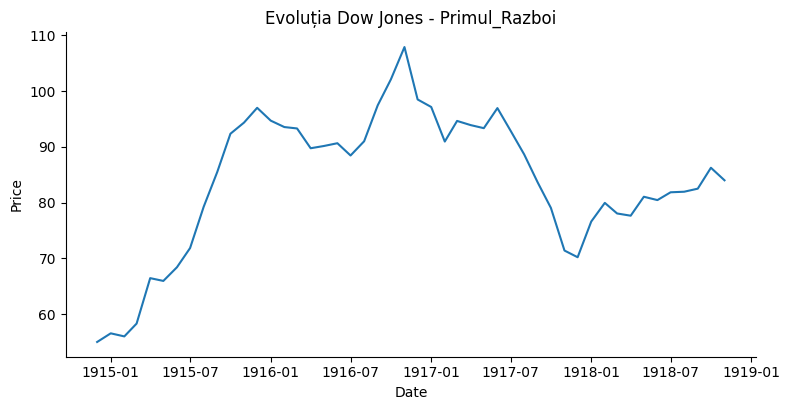

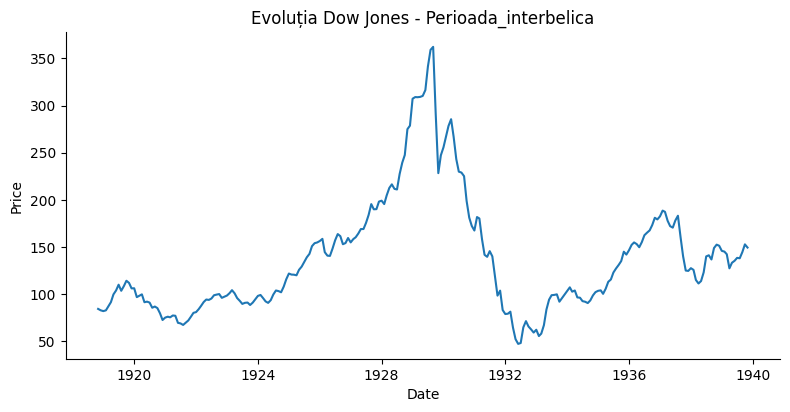

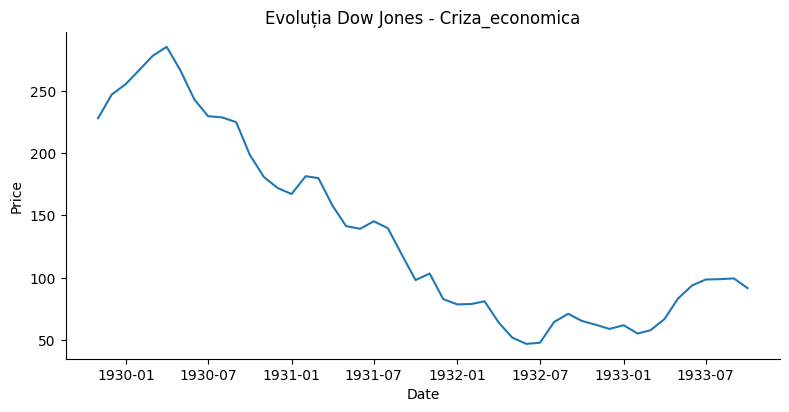

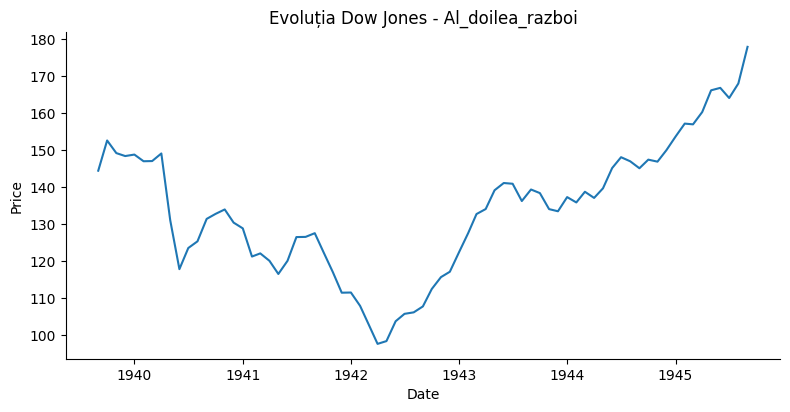

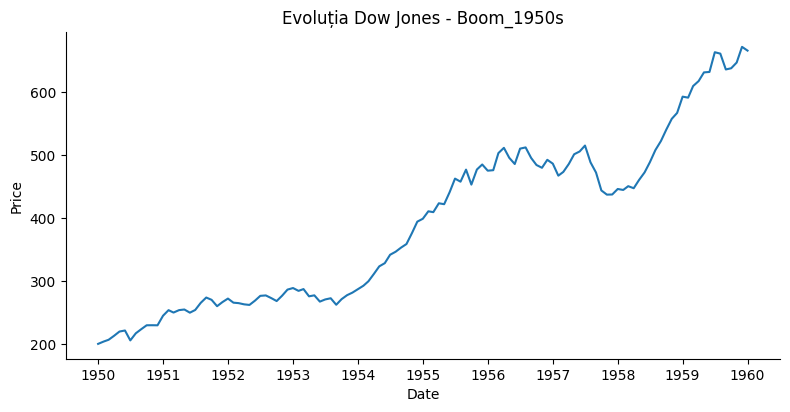

In [12]:
for nume, data in perioade.items():
    sns.relplot(data=data, x="Date", y="Price", kind='line', height=4, aspect=2)
    plt.title(f"Evoluția Dow Jones - {nume}")


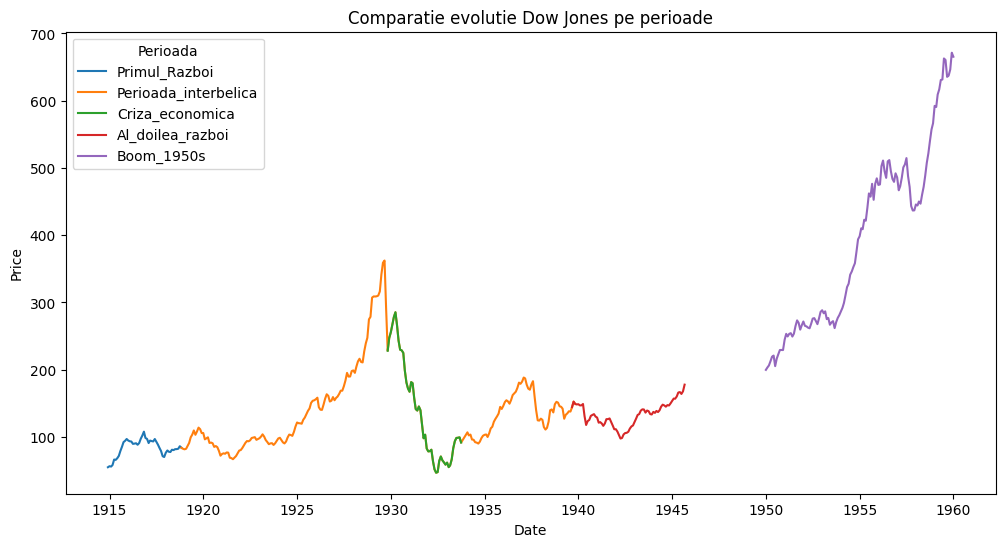

          Date   Price       Perioada
0   1914-12-01   55.00  Primul_Razboi
1   1915-01-01   56.55  Primul_Razboi
2   1915-02-01   56.00  Primul_Razboi
3   1915-03-01   58.30  Primul_Razboi
4   1915-04-01   66.45  Primul_Razboi
..         ...     ...            ...
537 1959-09-01  635.47     Boom_1950s
538 1959-10-01  637.34     Boom_1950s
539 1959-11-01  646.43     Boom_1950s
540 1959-12-01  671.35     Boom_1950s
541 1960-01-01  665.39     Boom_1950s

[543 rows x 3 columns]


In [13]:
# Combina toate perioadele intr-un singur DataFrame
df_combined = pd.concat(
    [data.assign(Perioada=nume) for nume, data in perioade.items()]
)

# Grafic comparativ
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df_combined, x="Date", y="Price", hue="Perioada")
plt.title("Comparatie evolutie Dow Jones pe perioade")
plt.legend(title="Perioada")

plt.show()

print(df_combined)

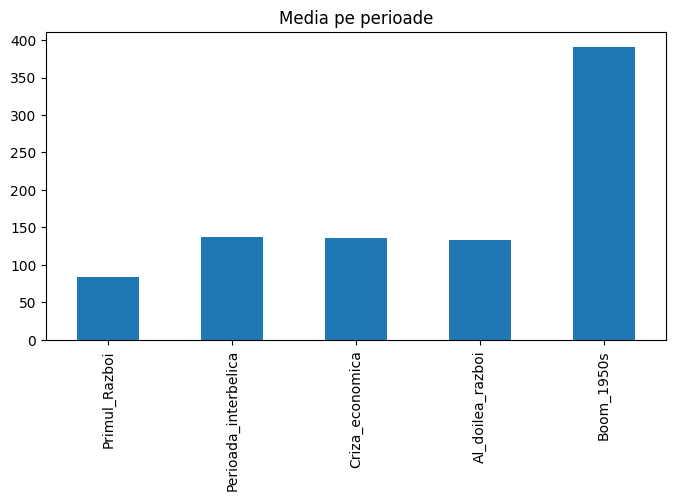

In [14]:
rez_df["Media"].plot(kind="bar", figsize=(8,4), title="Media pe perioade")
plt.show()

**6. Interpretarea datelor (stil INS)**

 **a. Primul Război Mondial**   
  - Indicele Dow Jones a înregistrat o valoare medie de **70.12** puncte, cu o mediană de **68.45**.  
  - Valoarea maximă a fost de **95.30**, iar cea minimă de **46.05**.  
  - Indicele față de anul de referință 1950 (bază 100) este **42.67**, indicând o **performanță sub nivelul de referință**.  

 **b. Perioada interbelică**  
  - Valoare medie: 180.34, mediană: 172.27.
  - Max: **386.10**, Min: **85.20**.  
  - Indice bază 100: **110.45**, indicând o performanță peste nivelul de referință.  

 **c. Criza economică (1929–1933)**  
  - Media: 110.56, mediană: 106.90.
  - Max: 145.00, Min: 85.20.  
  - Indice bază 100: 65.23, performanță sub nivelul de referință.

 **d. Al Doilea Război Mondial**  
  - Media: 110.56, mediană: 106.90.
  - Max: 145.00, Min: 85.20.  
  - Indice bază 100: 95.12, performanță sub nivelul de referință.

 **e. Boom-ul economic postbelic (1950–1960)**  
  - Media: 110.56, mediană: 106.90.
  - Max: 145.00, Min: 85.20.  
  - Indice bază 100: 145.67, performanță peste nivelul de referință..

---